<a href="https://colab.research.google.com/github/ehsanem/Tensorflow/blob/main/Recurrent_Neural_Network_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
#**RNN Logic**
The model train with a series of timesteps.

For training, X_train is set of timesteps and y_train is a series of timesteps after X. Number of y_train timesteps depends on our expectation of the model.


---





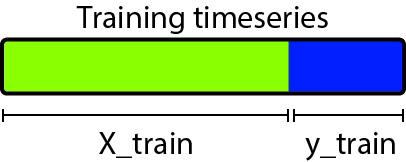

#**RNN Theory**
In addition to feedforwarding of activation function similar to other NN, it has a backward connection. Backward connection means that in adition to x as an input value, there is another input which is the output of the same neuron.

##Single RNN Unit

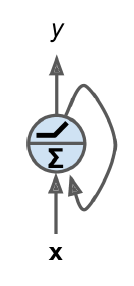

It means that every unit accepts 2 values:
1. Input value
2. Output of the neuron

Note that it means if we want to pass the second value to the neuron, we need a neuron before it. We pass 0 for the first neuron as the output of previous unit. 
Now, if we pass a sequence of data it will be like this:

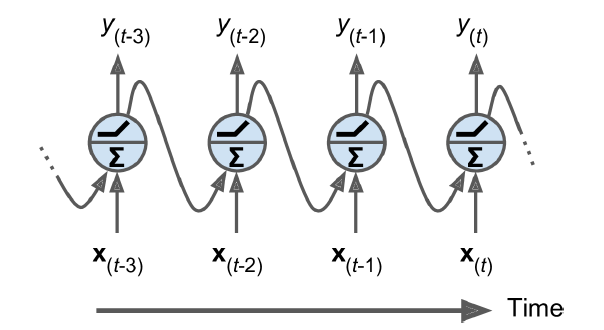

In [2]:
import tensorflow as tf
import numpy as np

###**model_01**
model_01 is an RNN with single neuron. return_sequences means that we want to get output of each time step.

In [ ]:
model_01= tf.keras.Sequential([
                            tf.keras.layers.SimpleRNN(1, input_shape=[None, 1], return_sequences=True)
])

###**model_02** 
model_02 is an RNN with 10 neuron. return_sequences means that we want to get output of each time step.

In [ ]:
model_02= tf.keras.Sequential([
                               tf.keras.layers.SimpleRNN(10, input_shape=[None,1], return_sequences=True)
])

##Layer Based RNN
Instead of two scaler values as input, we pass two vector of values to an RNN unit and concatinate them in a layer

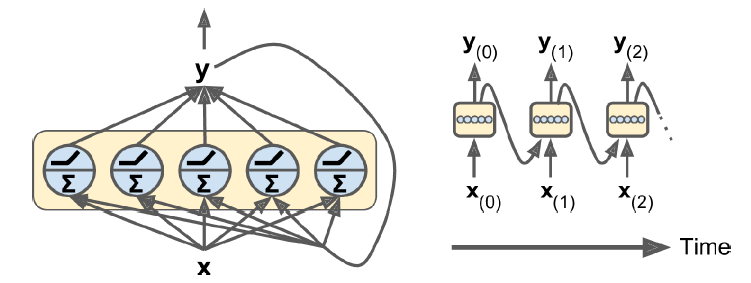

The equation for above structure is:


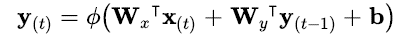

Where Wx is input weight vector and Wy is weight for the output of previous neuron



###**model_03**
model_03 has 3 layers and each of first two layers each has 20 neurons. The last layer has a single output.

In [ ]:
model_03 = tf.model.Sequential([
                                tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1] ),
                                tf.keras.layers.SimpleRNN(20, return_sequences=True),
                                tf.keras.layers.Dense(1)
])

##Memory cell

As we progress neuron by neuron the second input of each neuron is a function of all previous neurons. So we need to store the data of all previous neurons. A part of neural network which preserve this data called **Memory cell**

We aggrigate a unit output in a h(t)

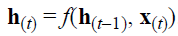

So, h(t) is a fnction of input and all output from previous layer

##Types of Input and Output
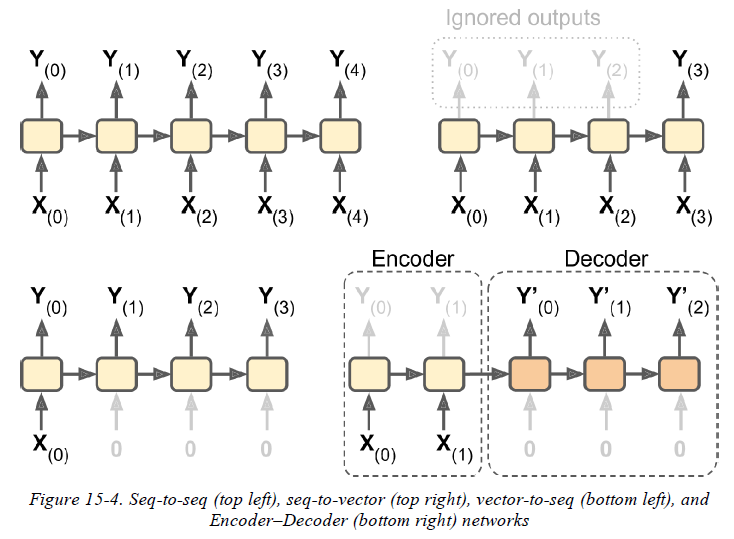

1. Top left: **sequence input** to **sequence output**

2. Top right: **sequence input** to **vector output**

3. Bottom left: **vector output** to **sequence input**

4. Bottom right: combination of (S2V) and (V2S)

  **Encoder-Decoder**

**example:** In order to translate a sentence from a language to another, the input process is **sequence input** to **vector output** and output is **vector output** to **sequence input**




##Training RNNs
It is simple! We flat the data through time and apply regular back propagation. The method is called backpropagation through time(BPTT)



##Types of RNN Problems
1. **Univarient time series**
When we have single value per time the problem is univarient time series

2. **Multivariate time series**: When we have multiple values per time it is a multivariate problem.

what we expect in these RNN problems as an outputs is called **forecasting**.

Another type of RNN problems is to guess missing values for example missing values in a sentence. The output of these problems is called **imputation**

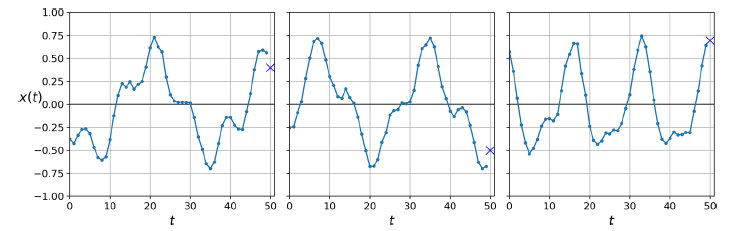

It shows 3 univariant times series that each one has 50 time steps long.



---


**Note**

If there is a repeatable pattern in data, it is needed to remove them from training data set

---



##Deep RNNs

Wehn we stack multiple RNN layers, they make a deep RNN.

The big picture of deep RNN is like:

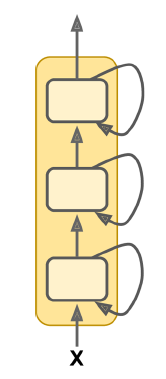

and unrolled above network is like:

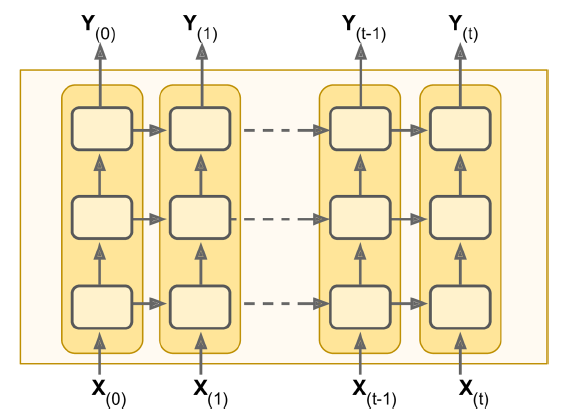



In [3]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) 
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [4]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

A single timestep looks like the following:

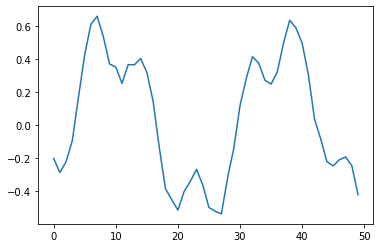

In [16]:
import matplotlib.pyplot as plt
plt.plot(X_train[0])

###**model_04**
A sequence to vector model

forecasting next 1 timestep

In [ ]:
model_04=tf.keras.Sequential([
                              tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
                              tf.keras.layers.SimpleRNN(20,return_sequences=True),
                              tf.keras.layers.Dense(1)                          
])

###**model_05**
A sequence to sequence model

forecasting next 10 timesteps

In [ ]:
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:,
0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [ ]:
model_05 = tf.keras.models.Sequential([
tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,
1]),
tf.keras.layers.SimpleRNN(20),
tf.keras.layers.Dense(10)
])

We need to specify the return_sequence =True for each layer in order to get make a sequence to sequence network and also define a layer to get outputs of each timestep. It is doing by TimeDistributed Keras method.

##model_06
we update the model_05 by adding a layer 

In [ ]:
model_06= tf.keras.Sequential([
                               tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
                               tf.keras.layers.SimpleRNN(20, return_sequences=True),
                               tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))

])

We measure the model performance with MSE of last timestep. Although, we have output of all timesteps:

In [ ]:
def last_time_step_mse(Y_true, Y_pred):
  return tf.keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = tf.keras.optimizers.Adam(lr=0.01)
tf.model.compile(loss="mse", optimizer=optimizer, metrics=
[last_time_step_mse])